In [2]:
import numpy as np
import pandas as pd

In [11]:
VT = pd.read_csv('../data/ucl/ucl/ucl.tsv', delimiter='\t')
JS = pd.read_csv('../data/ucl/ucl/ucl_sbx.tsv', delimiter='\t')
TG = pd.read_csv('../data/ucl/ucl/ucl_tg.tsv', delimiter='\t')

In [4]:
VT.head()

sha256                 time  \
0  7670e0667490c5478bf1786bf90f22c61eaf37fc58d7ec...  2016-07-19 10:40:34   
1  121fb6547fd5811ed8c42e225ac33a776f329a7438383d...  2016-07-19 10:39:33   
2  a41eda9c0977e022a1cf07606b32f1fcbee6dadeca0440...  2016-07-19 10:39:28   
3  e0b1d3e457b911b249ba42355f846b3ed772f59a675dfc...  2016-07-19 10:39:28   
4  bb3f821d91aa11ca9f37c302cad25680cbde0e3afe8ff4...  2016-07-19 10:39:23   

                                            verdicts  positives  submissions  
0  [["Microsoft", "SoftwareBundler:Win32/InstallM...          4            1  
1   [["Qihoo-360", "HEUR/QVM20.1.0000.Malware.Gen"]]          1            1  
2  [["McAfee-GW-Edition", "BehavesLike.Win32.Tool...          1            1  
3  [["F-Prot", "W32/Heuristic-KPP!Eldorado"], ["C...          2            1  
4  [["Ikarus", "AdWare.AdPlugin"], ["AVG", "AdPlu...          3            1

In [12]:
TG.head()

sha256  feature
0  0085d13265d2a5ffaa01693662f857846f62936a2e946d...      143
1  0085d13265d2a5ffaa01693662f857846f62936a2e946d...      144
2  0085d13265d2a5ffaa01693662f857846f62936a2e946d...      145
3  0085d13265d2a5ffaa01693662f857846f62936a2e946d...      146
4  0085d13265d2a5ffaa01693662f857846f62936a2e946d...      147

In [5]:
JS.head()

sha256  feature
0  0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c...       26
1  0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c...       27
2  00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...       26
3  00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...       27
4  0015bbc28f7a020b33026ad2d855620c812b989a1cb6a2...       28

In [6]:
len(JS['sha256'].unique())

17509

In [13]:
shas_js = JS['sha256'].unique()
shas_tg = TG['sha256'].unique()

In [44]:
import requests

def TG_scan(sha256):
    r = requests.get("https://panacea.threatgrid.com/api/v2/search/submissions",params={"q":sha256,"api_key":"25i6i00k0k91v3llsefesi5u6o"})
    x = r.json()
    #print(x)
    if  'data' not in x: 
        return
    items =x['data']['items']
    if items:
        for item in items:
            if 'analysis' in item['item']:
                return item['item']
        return items[0]

In [15]:
print len(shas_tg), len(shas_js)

2330 17509


In [18]:
shas = [sha for sha in shas_js if sha not in shas_tg]
print len(shas)

15179


In [61]:
temp2 = TG_scan(shas_tg[1])
print temp2

{u'vm_runtime': 300, u'status': u'job_done', u'sha1': u'd17a179f058fcda1129cde19d0d2758a6683cfec', u'submitted_at': u'2016-08-04T08:10:06Z', u'tags': None, u'analysis': {u'behaviors': [{u'name': u'pe-invalid-certificate-signature', u'threat': 90}, {u'name': u'memory-execute-readwrite', u'threat': 25}, {u'name': u'pe-certificate', u'threat': 10}, {u'name': u'pe-header-linker-minor', u'threat': 3}, {u'name': u'antivirus-service-flagged-artifact', u'threat': 95}], u'threat_score': 95, u'metadata': {u'general_details': {u'sandbox_version': u'pilot-d', u'report_created': u'2016-08-04T08:16:16Z', u'sandbox_id': u'phl-work-29'}, u'sandcastle_env': {u'analysis_start': u'2016-08-04T08:10:07Z', u'sandcastle': u'3.4.26.9516.0b5da10-1', u'controlsubject': u'winxp-x86-intel-2016.06.30', u'vm': u'winxp-x86', u'analysis_end': u'2016-08-04T08:15:59Z', u'sample_executed': 1470298256, u'run_time': 352, u'current_os': u'2600.xpsp.080413-2111', u'vm_id': u'82d340c7166049368ec9d49637cdef57'}, u'malware_des

In [92]:
#temp = []
ind = 756
for i in range(14969, len(shas)):
    sha = shas[i]
    scan = TG_scan(sha)
    if scan:
        if len(scan.keys()) > 3 and scan.has_key(u'analysis'):
            if scan[u'analysis'].has_key(u'behaviors'):
                for res in scan[u'analysis'][u'behaviors']:
                    temp.append([sha, str(res[u'name'])])
            else:
                temp.append([sha, 0])
    print ind
    ind += 1
    #if ind == 100: break

756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965


In [78]:
print np.array(temp)

[['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'antivirus-flagged-artifact']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'excessive-suspicious-activity']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'pe-encrypted-section']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'listening-port-opened']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'imports-IsDebuggerPresent']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'malware-sality-mutex']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'windows-firewall-modification']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'network-communications-http-get']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'memory-execute-readwrite']
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6'
  'modified-executable']
 ['024

In [93]:
len(temp)

5249

In [56]:
temp[97][u'analysis']

{u'metadata': {u'general_details': {u'report_created': u'2016-08-04T08:08:21Z',
   u'sandbox_id': u'phl-work-28',
   u'sandbox_version': u'pilot-d'},
  u'malware_desc': [{u'filename': u'0a039c9d664fe4299ed4ec096d1dcc3fc5a94eae8536744413ea630cf98fdfc0.exe',
    u'magic': u'PE32 executable (GUI) Intel 80386, for MS Windows',
    u'md5': u'811e3e6e9ae4fa4cc4058f1760e91b96',
    u'sha1': u'7faff95d82a672b407b4a068b70a03c58b01a3ad',
    u'sha256': u'0a039c9d664fe4299ed4ec096d1dcc3fc5a94eae8536744413ea630cf98fdfc0',
    u'size': 4284,
    u'type': u'exe'}],
  u'sandcastle_env': {u'analysis_end': u'2016-08-04T08:08:03Z',
   u'analysis_start': u'2016-08-04T08:02:12Z',
   u'controlsubject': u'winxp-x86-intel-2016.06.30',
   u'current_os': u'2600.xpsp.080413-2111',
   u'run_time': 351,
   u'sample_executed': 1470297780,
   u'sandcastle': u'3.4.26.9516.0b5da10-1',
   u'vm': u'winxp-x86',
   u'vm_id': u'8bdf398aa14ae19748bbd8bddb6cb59e'}},
 u'threat_score': 0}

In [62]:
temp2[u'analysis']

{u'behaviors': [{u'name': u'pe-invalid-certificate-signature', u'threat': 90},
  {u'name': u'memory-execute-readwrite', u'threat': 25},
  {u'name': u'pe-certificate', u'threat': 10},
  {u'name': u'pe-header-linker-minor', u'threat': 3},
  {u'name': u'antivirus-service-flagged-artifact', u'threat': 95}],
 u'metadata': {u'general_details': {u'report_created': u'2016-08-04T08:16:16Z',
   u'sandbox_id': u'phl-work-29',
   u'sandbox_version': u'pilot-d'},
  u'malware_desc': [{u'filename': u'b9c24e9357247127260d3986f9761f52.exe',
    u'magic': u'PE32 executable (GUI) Intel 80386, for MS Windows',
    u'md5': u'b9c24e9357247127260d3986f9761f52',
    u'sha1': u'd17a179f058fcda1129cde19d0d2758a6683cfec',
    u'sha256': u'00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977b71b2210e15b0ad0f0',
    u'size': 566096,
    u'type': u'exe'}],
  u'sandcastle_env': {u'analysis_end': u'2016-08-04T08:15:59Z',
   u'analysis_start': u'2016-08-04T08:10:07Z',
   u'controlsubject': u'winxp-x86-intel-2016.06.30',
   

In [69]:
scan = temp2
if scan.has_key(u'analysis'):
    if scan[u'analysis'].has_key(u'behaviors'):
        s = scan[u'analysis'][u'behaviors']
        print s[0][u'name']

pe-invalid-certificate-signature


In [80]:
shas[756]

'00fc0d56d8d0e5df369008fb5b49860351d7e96780a66effedad64d1b24384f9'

In [86]:
x = TG_scan(shas[756])

In [87]:
if x:
    print "HI"
else:
    print "BYE"

HI


In [89]:
temp

[['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'antivirus-flagged-artifact'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'excessive-suspicious-activity'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'pe-encrypted-section'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'listening-port-opened'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'imports-IsDebuggerPresent'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'malware-sality-mutex'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'windows-firewall-modification'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'network-communications-http-get'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'memory-execute-readwrite'],
 ['02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e66945e3463e4c8f11a7b6',
  'modified-

In [94]:
res = pd.DataFrame(temp)
res.head()

0  \
0  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...   
1  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...   
2  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...   
3  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...   
4  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...   

                               1  
0     antivirus-flagged-artifact  
1  excessive-suspicious-activity  
2           pe-encrypted-section  
3          listening-port-opened  
4      imports-IsDebuggerPresent

In [101]:
len(TG)

11159

In [102]:
TG_map_new = pd.read_csv('../data/ucl/ucl/ucl_features.tsv', delimiter='\t')

TG_map_final = pd.read_csv('../data/Jan_CSV/TG_ioc_map.csv')

In [108]:
TG_map_final.head()

index                          name
0      0     admin-group-user-addition
1      1     aedebug-settings-modified
2      2    antivirus-flagged-artifact
3      3         antivirus-flagged-cve
4      4  appcertdlls-dll-registration

In [110]:
TG_map = pd.merge(TG_map_new, TG_map_final, how='outer', left_on='name', right_on='name')

In [118]:
TG_map.to_csv('../data/ucl/feat_map.csv')

In [114]:
TG = pd.merge(left=TG, right=TG_map, how='left', left_on='feature', right_on='feature')

In [115]:
TG

sha256  feature  \
0      0085d13265d2a5ffaa01693662f857846f62936a2e946d...      143   
1      0085d13265d2a5ffaa01693662f857846f62936a2e946d...      144   
2      0085d13265d2a5ffaa01693662f857846f62936a2e946d...      145   
3      0085d13265d2a5ffaa01693662f857846f62936a2e946d...      146   
4      0085d13265d2a5ffaa01693662f857846f62936a2e946d...      147   
5      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...      143   
6      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...      144   
7      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...      145   
8      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...      146   
9      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...      147   
10     01e885b193725001745eb0045ebe2f68db977ec4e7adaf...      148   
11     01e885b193725001745eb0045ebe2f68db977ec4e7adaf...      149   
12     01e885b193725001745eb0045ebe2f68db977ec4e7adaf...      150   
13     03d1c94c1fc21277fdfb07c3e6de84386500f3d167204c...      151   
14     030177bc087ffd5c4bafee73d1f84327d37363d35f2352...      152   
15     030177bc087ffd5c4bafee73d1f84327d37363d35f2352...      153   
16     030177bc087ffd5c4bafee73d1f84327d37363d35f2352...      151   
17     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...      152   
18     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...      154   
19     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...      155   
20     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...      156   
21     0015cbe9e58b06426061b3cd09500a3c6ee2bc8f509d1e...      157   
22     0015cbe9e58b06426061b3cd09500a3c6ee2bc8f509d1e...      151   
23     0022385e15f46ad39bf5c8e6a29095e61779d341afe24f...      145   
24     0022385e15f46ad39bf5c8e6a29095e61779d341afe24f...      155   
25     002be898291fecb17583214308159e3b23981f6583013b...      151   
26     002fa35794a7328aee3c6a9d42fd215bb35bef862992c8...      158   
27     002fa35794a7328aee3c6a9d42fd215bb35bef862992c8...      154   
28     002fa35794a7328aee3c6a9d42fd215bb35bef862992c8...      151   
29     0048ed42e29360a9f22bdf1992f981383cf1cf92d6f2e5...      155   
...                                                  ...      ...   
11129  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      148   
11130  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      266   
11131  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      182   
11132  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      257   
11133  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      216   
11134  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      258   
11135  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      201   
11136  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      267   
11137  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      149   
11138  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      168   
11139  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      268   
11140  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      230   
11141  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      199   
11142  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      197   
11143  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      210   
11144  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      269   
11145  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      233   
11146  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      262   
11147  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      186   
11148  a5a6ef2a74f7ecab7850084e75ea9ed1bc05d99792e5ea...      241   
11149  0d3445a6173710e5d6c0537c62ad9a3c0ddb99f3114b63...      145   
11150  a749a05b567c92eb6edfc05b11dd2c42f46150e49caff3...      155   
11151  a749a05b567c92eb6edfc05b11dd2c42f46150e49caff3...      151   
11152  a972582d497b576f8ab89094ae4f3ce6e606e290670aa1...      155   
11153  a972582d497b576f8ab89094ae4f3ce6e606e290670aa1...      161   
11154  a972582d497b576f8ab89094ae4f3ce6e606e290670aa1...      163   
11155  a972582d497b576f8ab89094ae4f3ce6e606e2906

In [151]:
res1 = pd.merge(left=res, right=TG_map, how='left', left_on=1, right_on='name')

In [152]:
res1.loc[res1[1]==0,'index'] = 413

In [139]:
TG1 = TG.fillna(413)

In [143]:
TG1 = TG1[['sha256','index']]
TG1.drop_duplicates(inplace=True)
print len(TG1)

10190


In [153]:
res1.rename(columns={0:'sha256'},inplace=True)

In [154]:
res1 = res1[['sha256','index']]

In [156]:
#res1.fillna(value=413, inplace=True)
print len(res1)
res1.drop_duplicates(inplace=True)
print len(res1)

5249
4765


In [157]:
res1.head()

sha256  index
0  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...      2
1  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...     76
2  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...    266
3  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...    413
4  02448b9c5b07ceb98d3a59aea3bf8637fba85426e3e669...    107

In [162]:
TG_final = TG1.append(res1, ignore_index=True)

In [163]:
print len(TG_final)

14955


In [164]:
TG_final.to_csv('../data/ucl/ucl/TG_final.csv')

In [165]:
VT = pd.read_csv('../data/ucl/ucl/ucl.tsv', delimiter='\t')

In [166]:
VT.head()

sha256                 time  \
0  7670e0667490c5478bf1786bf90f22c61eaf37fc58d7ec...  2016-07-19 10:40:34   
1  121fb6547fd5811ed8c42e225ac33a776f329a7438383d...  2016-07-19 10:39:33   
2  a41eda9c0977e022a1cf07606b32f1fcbee6dadeca0440...  2016-07-19 10:39:28   
3  e0b1d3e457b911b249ba42355f846b3ed772f59a675dfc...  2016-07-19 10:39:28   
4  bb3f821d91aa11ca9f37c302cad25680cbde0e3afe8ff4...  2016-07-19 10:39:23   

                                            verdicts  positives  submissions  
0  [["Microsoft", "SoftwareBundler:Win32/InstallM...          4            1  
1   [["Qihoo-360", "HEUR/QVM20.1.0000.Malware.Gen"]]          1            1  
2  [["McAfee-GW-Edition", "BehavesLike.Win32.Tool...          1            1  
3  [["F-Prot", "W32/Heuristic-KPP!Eldorado"], ["C...          2            1  
4  [["Ikarus", "AdWare.AdPlugin"], ["AVG", "AdPlu...          3            1

In [168]:
VT2 = pd.read_csv('../data/families/families/VT_time.tsv', delimiter='\t')

In [169]:
VT2.head()

sha256                 time  \
0  7670e0667490c5478bf1786bf90f22c61eaf37fc58d7ec...  2016-07-19 10:40:34   
1  121fb6547fd5811ed8c42e225ac33a776f329a7438383d...  2016-07-19 10:39:33   
2  a41eda9c0977e022a1cf07606b32f1fcbee6dadeca0440...  2016-07-19 10:39:28   
3  e0b1d3e457b911b249ba42355f846b3ed772f59a675dfc...  2016-07-19 10:39:28   
4  bb3f821d91aa11ca9f37c302cad25680cbde0e3afe8ff4...  2016-07-19 10:39:23   

                                            verdicts  positives  
0  [["Microsoft", "SoftwareBundler:Win32/InstallM...          4  
1   [["Qihoo-360", "HEUR/QVM20.1.0000.Malware.Gen"]]          1  
2  [["McAfee-GW-Edition", "BehavesLike.Win32.Tool...          1  
3  [["F-Prot", "W32/Heuristic-KPP!Eldorado"], ["C...          2  
4  [["Ikarus", "AdWare.AdPlugin"], ["AVG", "AdPlu...          3

In [170]:
len(VT)

660074

In [171]:
len(VT2)

4207

In [173]:
TG_final['val'] = 1

In [174]:
TG_out = TG_final.pivot(index='sha256',columns='index',values='val')

In [182]:
len(TG_final['sha256'].unique())

3215

In [187]:
#TG_final.drop('val',axis=1,inplace=True)
TG_final

sha256  index
0      0085d13265d2a5ffaa01693662f857846f62936a2e946d...    413
1      0085d13265d2a5ffaa01693662f857846f62936a2e946d...    212
2      0085d13265d2a5ffaa01693662f857846f62936a2e946d...    258
3      0085d13265d2a5ffaa01693662f857846f62936a2e946d...    269
4      0085d13265d2a5ffaa01693662f857846f62936a2e946d...    325
5      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...    413
6      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...    212
7      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...    258
8      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...    269
9      00c5bf3f124a76d3d00a6e356783bd7e9473e2c728c977...    325
10     01e885b193725001745eb0045ebe2f68db977ec4e7adaf...    104
11     01e885b193725001745eb0045ebe2f68db977ec4e7adaf...    216
12     01e885b193725001745eb0045ebe2f68db977ec4e7adaf...     11
13     03d1c94c1fc21277fdfb07c3e6de84386500f3d167204c...    413
14     030177bc087ffd5c4bafee73d1f84327d37363d35f2352...    266
15     030177bc087ffd5c4bafee73d1f84327d37363d35f2352...    270
16     030177bc087ffd5c4bafee73d1f84327d37363d35f2352...    413
17     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...    266
18     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...    290
19     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...    413
20     00150a6b2db4ae12d83370788427457aae54d0a3bebd6f...    277
21     0015cbe9e58b06426061b3cd09500a3c6ee2bc8f509d1e...    292
22     0015cbe9e58b06426061b3cd09500a3c6ee2bc8f509d1e...    413
23     0022385e15f46ad39bf5c8e6a29095e61779d341afe24f...    258
24     0022385e15f46ad39bf5c8e6a29095e61779d341afe24f...    413
25     002be898291fecb17583214308159e3b23981f6583013b...    413
26     002fa35794a7328aee3c6a9d42fd215bb35bef862992c8...    107
27     002fa35794a7328aee3c6a9d42fd215bb35bef862992c8...    290
28     002fa35794a7328aee3c6a9d42fd215bb35bef862992c8...    413
29     0048ed42e29360a9f22bdf1992f981383cf1cf92d6f2e5...    413
...                                                  ...    ...
14925  3d08fc46afb09882e19b1a3ab0e81c5776271f29fb2bab...     99
14926  3d0b685a9e16d8b5d3da8baa761f1fddec2b624af9125f...    107
14927  3d0b685a9e16d8b5d3da8baa761f1fddec2b624af9125f...    216
14928  3d0b685a9e16d8b5d3da8baa761f1fddec2b624af9125f...    214
14929  3d3de4147281bc44d751d42a12c97425310065e4fa3d9c...    293
14930  3d3de4147281bc44d751d42a12c97425310065e4fa3d9c...    212
14931  3d3de4147281bc44d751d42a12c97425310065e4fa3d9c...    104
14932  3d3de4147281bc44d751d42a12c97425310065e4fa3d9c...    413
14933  3d3de4147281bc44d751d42a12c97425310065e4fa3d9c...     20
14934  3d3de4147281bc44d751d42a12c97425310065e4fa3d9c...    216
14935  3dd5ef3f5c4efea9dbcf4723b8ef99e568fa9b300ab160...    268
14936  3de1061885f905c41e94ea3eabc6b36c8e320d63526779...    413
14937  3e389a11d9968cc9efb69fc31ff88a26b89433e565c573...    413
14938  3e488c07f7a51f87d6479baa121b15fa8886a11dc11a29...    413
14939  3e4ee8bfdc25c2139dd17e6d39253cf3e6fa7c6e395255...      2
14940  3e4ee8bfdc25c2139dd17e6d39253cf3e6fa7c6e395255...    156
14941  3e544c0848804909bb5e046c35d7e3a3a4b9fbcda95fea...    107
14942  3e544c0848804909bb5e046c35d7e3a3a4b9fbcda95fea...    413
14943  3e7282676ecb856c2f8a5259edd199cb1ec5167534c14a...    107
14944  3e7282676ecb856c2f8a5259edd199cb1ec5167534c14a...    413
14945  3e7282676ecb856c2f8a5259edd199cb1ec5167534c14a...     20
14946  3e7282676ecb856c2f8a5259edd199cb1ec5167534c14a...    326
14947  3e7282676ecb856c2f8a5259edd199cb1ec5167534c14a...    216
14948  3e7282676ecb856c2f8a5259edd199cb1ec5167534c14a...     11
14949  3ee16edc117b062340edea12f1233455cecb327776a111...    212
14950  3ee16edc117b062340edea12f1233455cecb327776a111...    413
14951  3ee16edc117b062340edea12f1233455cecb327776a111...     10
14952  3ee16edc117b062340edea12f1233455cecb327776a111...    292
14953  3ee16edc117b062340edea12f1233455cecb327776a111...    216
14954  3ee16edc117b062340edea12f1233455cecb327776a111...     99

[14955 rows x 2 columns]

In [191]:
cols = pd.DataFrame([['dummy', i] for i in range(0,414)])
cols.rename(columns={0: 'sha256', 1:'index'},inplace=True)
TG_final = TG_final.append(cols)

In [196]:
TG_final['val'] = 1
TG_final['index'] = np.array(TG_final['index'], dtype=int)
TG_pivot = TG_final.pivot(index='sha256', columns='index', values='val')
TG_pivot.fillna(value=0,inplace=True)
TG_pivot

index                                               0    1    2    3    4    \
sha256                                                                        
0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c7...    0    0    0    0    0   
0000ea8afea8f3a123d638e0de3d2671bce2e923f9c321c...    0    0    0    0    0   
0003f3eea411c06e99c4afbb964a91428569c25d4b15d18...    0    0    0    0    0   
000432b19820e6e2b17306348e7498057b6d52c014a0e17...    0    0    0    0    0   
0006715ce5b2153a2f867c6b5ee510573fa9a324f205e5a...    0    0    0    0    0   
0008a99c026deda4a81a61603a77a5803764178b0da6f0b...    0    0    0    0    0   
000903ecdc1d0f57423e4c4fc1f011421313936be8988d7...    0    0    0    0    0   
000a38be3d98a954f4793eaff155a3cc752aa8b4ead82fd...    0    0    0    0    0   
000a749da5018a40ea52bf2f0fa20d41ebad30cdf29eb5c...    0    0    0    0    0   
000a96aa393a4a4776f6967c66e96bd5157ddbb5defc1d5...    0    0    0    0    0   
000ad3f4d4a3d68de3634f68fc150823bcc88eb8f3df4cb...    0    0    0    0    0   
000b9be03c72895de7a9345b0dd7809eb42fa5c5848a3e3...    0    0    0    0    0   
000f9e524eeff70db5308f65d08bfbe3be0e94a67a2cf70...    0    0    0    0    0   
0010b56e96f39298878ea8b89b4e4b14ec0c9f79d181995...    0    0    0    0    0   
0011b9d571f1036f10934cb0a5c42e3dc68bb11c305fcc9...    0    0    0    0    0   
0011d226da27ccb5502920459b80eeb84ea1c10dbfe4dcb...    0    0    0    0    0   
0011eccc14b25f11be3d460dafe649f7533b85a238c20cb...    0    0    0    0    0   
00123baae71950576a12c1dd60058f52e8076c613fe44f3...    0    0    0    0    0   
0012c87ef3c149d5a226eb06417d57836a7edfbcbbe180f...    0    0    1    0    0   
001382e48e1331a35faa1e854020172b4e3fd12c59a1d15...    0    0    0    0    0   
0013f759aac9dec6e7cf849d5506b01b91b1f5785fb52ad...    0    0    0    0    0   
00150a6b2db4ae12d83370788427457aae54d0a3bebd6f5...    0    0    0    0    0   
0015cbe9e58b06426061b3cd09500a3c6ee2bc8f509d1e7...    0    0    0    0    0   
0015eba88485515347d36ed44a2f10ecfaf03858986ca0a...    0    0    0    0    0   
00168077e436c12669c9e64217b775190e3ad1fec9500c3...    0    0    1    0    0   
0016a59ffe5bafd5ea863fa3d815b5697ed0786675aa25c...    0    0    0    0    0   
00190d81181ca0c1ef64048f351b835392c85c812616370...    0    0    0    0    0   
0019f06921b32b464aa0e6d3a20ac048c63966806b0bf3d...    0    0    0    0    0   
001a4641f31dfe56a54d21e46e3ffa8212f6c506fb3533e...    0    0    0    0    0   
001c43ad7a0baad6cf6fbe1f26004bacdb1e0e33a6374a4...    0    0    0    0    0   
...                                                 ...  ...  ...  ...  ...   
f6334511ca38d7bce599ed8fadba0a05387cd5e4930b783...    0    0    0    0    0   
f68654d48ffa6c52b8549120ac1a71fe8762fe34faff7b3...    0    0    0    0    0   
f6a38c03dc7b6fae33bfa998eeb6b5190a94ac8cac7f4c8...    0    0    0    0    0   
f6c80e25045dd9a721dfd04f1e76eeb6f907d2718ce9091...    0    0    0    0    0   
f6ca611736f6a7339875c78b432cd8dfb0b011893df8acb...    0    0    0    0    0   
f6fee1c32c958f48d05cde42caa91fbead01342969d47b2...    0    0    0    0    0   
f74b527ed509a2edf429cc420df9613f8d5e84a5657ddbc...    0    0    0    0    0   
f774f8b45f53385bc795bce473c4303bec942561fa7f784...    0    0    0    0    0   
f7cc401d49d359a1be5122592db124fb27379f8e24af0f8...    0    0    0    0    0   
f7e2e96570dd64fb62a5f3a0400c8b6991a715fb35b4cd4...    0    0    0    0    0   
f83d799c0b2efd0fd70d3417f30ec5c32e3773c80058911...    0    0    1    0    0   
f8825fbc84a59fa87ecb8e313d0b49aa25e11a3dd99347a...    0    0    0    0    0   
f8d7164411a13b626b4b876f9d241ad627e1ef1cbaee44d...    0    0    0    0    0   
f947f09cd72ee1799fcb4ded37d5d1b6da25f4c297666a3...    0    0    0    0    0   
f94e01b7e623b9fd674967520d6a53e15257ad1d26891d9...    0    0    0    0    0   
f9a9ffa6ae82492f3d359075e0c05f749a1b875a830594d...    0    0    0    0    0   
f9dec6661b379790cca6398335da9229f2c84c06733a699...    0    0    0    0    0   
fab4a2afca84ff877ecb3c27dbdbbcaec78be22f5663fba...

In [197]:
import re
import json

# list of AV regexes, some of the engines are omitted because they don't provide family descriptions
trend = '(?P<system>.+)_(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?'
sym = '(?P<system>[A-Za-z0-9]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?'
kav = '((UDS|not-a-virus|HEUR):)*(?P<method>[A-Za-z0-9\-]+)\.(?P<system>[A-Za-z0-9\-]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?'
sophos ='((?P<system>.+)/)?(?P<family>[A-Za-z]+)(?:\-(?P<variant>.*))?'
mcafee ='((?P<system>.+)/)?(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?( .*)?'
rising = '(?:(?P<method>(Trojan|Malware|Worm|Virus|Adware|Backdoor)\.)?(?P<system>Win32\.)(?P<family>[A-Za-z]+)[\.!](?P<variant>.+))?'
fprot = '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?'#'W32/Virut.AI!Generic (suspicious)',
format1 ='((Gen|Dropped|DeepScan):)?(?P<system>[A-Za-z0-9]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?'
format2 = '((?P<system>Win32|HEUR|Win-PUP|Win-Trojan)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?|(?P<method>.*)/(?P<system1>.*)\.(?P<family1>.*))'#'Win-PUP/DomaIQ.Gen',
format3 = '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?'
format4 = '(?P<system>.+)/(?P<method>[A-Za-z]+)(?:\.(?P<family>.*))?'

av_re = {'trendmicro-housecall':'(?P<method>[A-Za-z]+)_(?P<family>[A-Za-z]+)\.(?P<variant>.+)',
         'zoner':'(?P<method>[A-Za-z]+)\.(?P<family>[A-Za-z]+)',
         'nprotect':'(?P<method>[A-Za-z]+)\.(?P<family>[A-Za-z]+)\.(?P<variant>.+)',
         'comodo':'(?P<method>[A-Za-z]+)\.(?P<system>.+)\.(?P<family>[A-Za-z]+)\.(?P<variant>.+)',
         'baidu':'(?P<system>[A-Za-z]+)\.(?P<method>.+)\.(?P<family>[A-Za-z]+)\.(?P<variant>.+)',
         'aegislab':'(?P<method>[A-Za-z]+)\.(?P<system>.+)\.(?P<family>[A-Za-z]+)',
         'thehacker': '(?P<method>[A-Za-z]+)/(?P<family>[A-Za-z]+)\.(?P<variant>.*)',
         'yandex': '(?P<method>[A-Za-z]+)\.(?P<family>[A-Za-z]+)!(?P<variant>.*)',
         'zillya': '(?P<method>[A-Za-z]+)\.(?P<family>[A-Za-z]+)\.(?P<system>.+)\.(?P<variant>.*)',
         'cat-quickheal':'(?P<method>[A-Za-z]+)\.(?P<family>[A-Za-z]+)\.(?P<variant>.*)',
         'malwarebytes':'(?P<method>[A-Za-z]+)\.(?P<family>[A-Za-z]+)',
         'virobot':'(?P<method>[A-Za-z]+)\.(?P<system>.+)\.(?P<family>[A-Za-z]+)\.(?P<variant>.*)',
         'avira':'(?P<method>[A-Za-z]+)/(?P<family>[A-Za-z]+)\.(?P<misc>[A-Za-z]+)\.(?P<variant>.*)',
         'esetnod32': '(?P<system>.[A-Za-z0-9]+)/(?:(?P<extra>[A-Za-z]+)\.)??(?P<family>[A-Za-z0-9]+)(?:\.(?P<variant>[A-Za-z0-9]+))?(\.gen)?( (?P<extra1>.+))?$',
         'microworld-escan':format1,
         'superantispyware':'(?P<method>.+)\.(?P<desc>[A-Za-z]+)/(?:Gen\-)?(?P<family>.*)',
         'ad-aware':format1,
         'ahnlab': format2,
         'jiangmin': sym,
         'antiy-avl': format4,
         'ahnlab-v3': format4,
         'eset-nod32': format3,
         'agnitum':'(?P<method>[A-Za-z]+).(?P<family>[A-Za-z]+)!(?P<variant>.*)',
         'qihoo-360': format2,
         'antivir': format3,
         'arcabit': format3,
         'vipre': rising,
         'trendmicro':  trend,
         'sophos_online':sophos,
         'symantec_beta': sym,
         'baidu-international':kav,
         'tencent':kav,
         'nano-antivirus':kav,
         'sunbelt': '(?P<method>(Email-Worm|LooksLike|BehavesLike|Trojan|Net-Worm|Virus|Trojan-Downloader|Backdoor|Worm|Adware)\.)?(?P<system>[A-Za-z0-9\-]+\.)?(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?( [\([a-zA-Z\)]+)?',
         'trendmicro_consumer': trend,
         'rising': rising,
         'ikarus': kav,
         'fortinet': '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'PUA/DomaIQ.Gen7',
         'avg': '(?:(?P<system>Win32|[A-Za-z0-9\-]+/))?(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'DomaIQ.AC (Adware)',
         'panda': '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'PUA/DomaIQ.Gen7',
         'virusbuster': '(?P<system>[A-Za-z0-9]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',
         'gdata': format1,
         'f-secure': format1,
         'alyac': format1,
         'emsisoft': format1,
         'symantec_online':  sym,
         'bitdefender': format1,
         'rising_online': rising,
         'mcafeegwedition_online': '(?P<system>[A-Za-z0-9]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',
         'avast': '(?P<system>.+):(?P<family>[A-Za-z]+)(?:\:(?P<variant>.*))?',#'Win32:Sality',
         'drweb': '(?P<system>[A-Za-z0-9]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',
         'symantec': sym,
         'command_online':'(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'W32/Virut.E.gen!Eldorado',
         'vba32': '(?P<system>[A-Za-z0-9\-]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',
         'f_prot': fprot,
         'f-prot': fprot,
         'mcafee_online': mcafee,
         'clamav': '(?P<system>[A-Za-z0-9]+)\.(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',
         'ca_av': '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',
         'kaspersky': kav,
         'mcafee': mcafee,
         'mcafee-gw-edition': mcafee,
         'k7computing': '(?P<system>[A-Za-z\-]+) \((?P<variant>[a-f0-9]+)\)',#'Unwanted-Program (004942d81)',
         'panda_online': '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'PUP/MultiToolbar.A',
         'kaspersky_online': kav,
         'sophos': sophos,
         'mcafee_beta': mcafee,
         'trendmicro_beta': '(?P<system>.+)_(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'ADW_PULSOFT.SM',
         'command': '(?P<system>.+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>.*))?',#'W32/Virut.E.gen!Eldorado',
         'norman': '(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',
         'microsoft': '(?P<method>[A-Za-z0-9]+):(?P<system>[A-Za-z0-9]+)/(?P<family>[A-Za-z]+)(?:\.(?P<variant>[A-Za-z0-9]+))?',#'Virus:Win32/Virut.K',
         'quickheal': '(?P<system>[A-Za-z0-9\-]+)\.(?P<family>[A-Za-z]+)(?:\-(?P<variant>[A-Za-z0-9]+))?'
         }

#comile Regexs
for x,y in av_re.items():
    #print x,y
    av_re[x] = re.compile(y)

#apply the regexes and extract dict
def vt_opinions(vt):
    xys =  [(a.lower(),b) for a,b in vt]
    opinions = []
    for x,y in xys:

        if x in av_re:
            r = av_re[x].match(y)
            if r:
                family = r.groupdict().get('family')
                if family:
                    opinions.append((x,family.lower()))

    return opinions


In [198]:
    DF = pd.read_csv('../data/ucl/ucl/ucl.tsv',delimiter='\t')

    # Sort by time index
    DF.sort_values('time', inplace=True)

    # Split into first & last detection arrays
    DF_firsts = DF.drop_duplicates(subset='sha256', keep='first')
    DF_lasts = DF.drop_duplicates(subset='sha256', keep='last')

    # Get the set of VirusTotal AV vendors
    VT_vendors = set()
    for x in DF.verdicts:
        for y in vt_opinions(json.loads(x)):
            VT_vendors.add(y[0])

    # The list of RL vendors:
    RL_vendors = set(['ahnlab', 'antivir',
       'avast', 'avg', 'bitdefender', 'ca_av', 'clamav', 'command',
       'command_online', 'drweb', 'esetnod32', 'f_prot', 'fortinet', 'gdata',
       'ikarus', 'k7computing', 'kaspersky', 'kaspersky_online', 'mcafee',
       'mcafee_beta', 'mcafee_online', 'mcafeegwedition_online', 'microsoft',
       'norman', 'panda', 'panda_online', 'quickheal', 'rising',
       'rising_online', 'sophos', 'sophos_online', 'sunbelt', 'symantec',
       'symantec_beta', 'symantec_online', 'trendmicro', 'trendmicro_beta',
       'trendmicro_consumer', 'vba32', 'virusbuster'])

    # Now get the overlap vendor list
    vendors = list(VT_vendors.intersection(RL_vendors))

    # Build the joint array
    DF_joint = pd.merge(left=DF_firsts, right=DF_lasts, left_on='sha256', right_on='sha256')
    # Time dependencies
    DF_joint['time_x'] = pd.to_datetime(DF_joint['time_x'])
    DF_joint['time_y'] = pd.to_datetime(DF_joint['time_y'])
    DF_joint['lapse'] = (DF_joint['time_y'] - DF_joint['time_x']) / np.timedelta64(1, 'D')
    # Detection dependencies
    DF_joint['movement'] = DF_joint['positives_y'] - DF_joint['positives_x']
    # Add vendor columns
    for v in vendors:
        DF_joint[v] = 0

    # Get final labels
    # Current heuristic: Final detection with zero positives is clean, more than 4 is malware, rest uncertain
    # With > 1 week elapsed data will be able to refine the heuristic
    DF_joint['label'] = -1
    DF_joint.loc[DF_joint[DF_joint['positives_y'] > 4].index, 'label'] = 1
    DF_joint.loc[DF_joint[DF_joint['positives_y'] == 0].index, 'label'] = 0

    # Set the vendor verdicts (based on first detection only)
    for (index, row) in DF_joint.iterrows():
        for y in vt_opinions(json.loads(row['verdicts_x'])):
            if y[0] in vendors:
                DF_joint.loc[index, y[0]] = 1


In [199]:
DF_joint.head()

sha256              time_x  \
0  83486695a2dc925c94f6cb365a8be5ec05904ebeb7ab63... 2016-07-19 09:00:00   
1  0c398616d372cf930502b33c952277caf4a67e2465c06a... 2016-07-19 09:00:01   
2  5091386e988960af685e8cc285c11acd9a2a6ca19006cf... 2016-07-19 09:00:03   
3  92f07d30d3244b4a8053877755b07cbcb7cf5b8ada75bd... 2016-07-19 09:00:09   
4  a749a05b567c92eb6edfc05b11dd2c42f46150e49caff3... 2016-07-19 09:00:10   

                                          verdicts_x  positives_x  \
0  [["TheHacker", "W32/Behav-Heuristic-CorruptFil...            3   
1                [["Avast", "Win32:Evo-gen [Susp]"]]            1   
2  [["McAfee-GW-Edition", "BehavesLike.Win32.Adwa...            2   
3  [["TheHacker", "W32/Behav-Heuristic-CorruptFil...            3   
4  [["TheHacker", "W32/Behav-Heuristic-CorruptFil...            3   

   submissions_x              time_y  \
0              1 2016-07-22 09:25:34   
1              1 2016-08-04 14:29:35   
2              1 2016-07-28 15:36:03   
3              1 2016-07-22 09:28:21   
4              1 2016-08-04 14:29:37   

                                          verdicts_y  positives_y  \
0  [["TheHacker", "W32/Behav-Heuristic-CorruptFil...            3   
1                [["Avast", "Win32:Evo-gen [Susp]"]]            1   
2  [["Symantec", "Heur.AdvML.B"], ["AegisLab", "H...            3   
3  [["TheHacker", "W32/Behav-Heuristic-CorruptFil...            3   
4  [["TheHacker", "W32/Behav-Heuristic-CorruptFil...            5   

   submissions_y      lapse  ...    clamav  kaspersky  bitdefender  mcafee  \
0              0   3.017755  ...         0          0            0       0   
1              0  16.228866  ...         0          0            0       0   
2              0   9.275000  ...         0          0            0       0   
3              0   3.019583  ...         0          0            0       0   
4              0  16.228785  ...         0          0            0       0   

   sophos  ikarus  fortinet  avg  panda  label  
0       0       1         0    0      0     -1  
1       0       0         0    0      0     -1  
2       0       1         0    0      0     -1  
3       0       0         0    0      0     -1  
4       0       0         0    0      0      1  

[5 rows x 28 columns]

In [203]:
len(DF_joint[DF_joint['label']==0])

23358

In [219]:
TG_pivot.head()

index                                               0    1    2    3    4    \
sha256                                                                        
0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c7...    0    0    0    0    0   
0000ea8afea8f3a123d638e0de3d2671bce2e923f9c321c...    0    0    0    0    0   
0003f3eea411c06e99c4afbb964a91428569c25d4b15d18...    0    0    0    0    0   
000432b19820e6e2b17306348e7498057b6d52c014a0e17...    0    0    0    0    0   
0006715ce5b2153a2f867c6b5ee510573fa9a324f205e5a...    0    0    0    0    0   

index                                               5    6    7    8    9    \
sha256                                                                        
0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c7...    0    0    0    0    0   
0000ea8afea8f3a123d638e0de3d2671bce2e923f9c321c...    0    0    0    0    0   
0003f3eea411c06e99c4afbb964a91428569c25d4b15d18...    0    0    0    0    0   
000432b19820e6e2b17306348e7498057b6d52c014a0e17...    0    0    0    0    0   
0006715ce5b2153a2f867c6b5ee510573fa9a324f205e5a...    0    0    0    0    0   

index                                              ...   404  405  406  407  \
sha256                                             ...                        
0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c7... ...     0    0    0    0   
0000ea8afea8f3a123d638e0de3d2671bce2e923f9c321c... ...     0    0    0    0   
0003f3eea411c06e99c4afbb964a91428569c25d4b15d18... ...     0    0    0    0   
000432b19820e6e2b17306348e7498057b6d52c014a0e17... ...     0    0    0    0   
0006715ce5b2153a2f867c6b5ee510573fa9a324f205e5a... ...     0    0    0    0   

index                                               408  409  410  411  412  \
sha256                                                                        
0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c7...    0    0    0    0    0   
0000ea8afea8f3a123d638e0de3d2671bce2e923f9c321c...    0    0    0    0    0   
0003f3eea411c06e99c4afbb964a91428569c25d4b15d18...    0    0    0    0    0   
000432b19820e6e2b17306348e7498057b6d52c014a0e17...    0    0    0    0    0   
0006715ce5b2153a2f867c6b5ee510573fa9a324f205e5a...    0    0    0    0    0   

index                                               413  
sha256                                                   
0000d6fd509e5490ddff5145d69578c6ce3ebd19fe9a9c7...    0  
0000ea8afea8f3a123d638e0de3d2671bce2e923f9c321c...    1  
0003f3eea411c06e99c4afbb964a91428569c25d4b15d18...    1  
000432b19820e6e2b17306348e7498057b6d52c014a0e17...    1  
0006715ce5b2153a2f867c6b5ee510573fa9a324f205e5a...    1  

[5 rows x 414 columns]

In [242]:
ind = 0
for (index, row) in TG_pivot.iterrows():
    if index == 'dummy': continue
    DF_joint.loc[DF_joint['sha256'] == index,'in_TG'] = 1
    print ind
    ind += 1
print "HI"

HI


In [233]:
DF_joint[DF_joint['in_TG'] == 1]['label'].value_counts()

 1    1939
-1     948
 0     328
Name: label, dtype: int64

In [235]:
VT_op = DF_joint[DF_joint['in_TG'] == 1]
VT_op.sort_values('sha256',inplace=True)

C:\Anaconda3\envs\python2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [240]:
#TG_pivot['sha256'] = TG_pivot.index.values
TG_pivot.reset_index(drop=True, inplace=True)
TG_pivot

index  0  1  2  3  4  5  6  7  8  9  \
0      0  0  0  0  0  0  0  0  0  0   
1      0  0  0  0  0  0  0  0  0  0   
2      0  0  0  0  0  0  0  0  0  0   
3      0  0  0  0  0  0  0  0  0  0   
4      0  0  0  0  0  0  0  0  0  0   
5      0  0  0  0  0  0  0  0  0  0   
6      0  0  0  0  0  0  0  0  0  0   
7      0  0  0  0  0  0  0  0  0  0   
8      0  0  0  0  0  0  0  0  0  0   
9      0  0  0  0  0  0  0  0  0  0   
10     0  0  0  0  0  0  0  0  0  0   
11     0  0  0  0  0  0  0  0  0  0   
12     0  0  0  0  0  0  0  0  0  0   
13     0  0  0  0  0  0  0  0  0  0   
14     0  0  0  0  0  0  0  0  0  0   
15     0  0  0  0  0  0  0  0  0  0   
16     0  0  0  0  0  0  0  0  0  0   
17     0  0  0  0  0  0  0  0  0  0   
18     0  0  1  0  0  0  0  0  0  0   
19     0  0  0  0  0  0  0  0  0  0   
20     0  0  0  0  0  0  0  0  0  0   
21     0  0  0  0  0  0  0  0  0  0   
22     0  0  0  0  0  0  0  0  0  0   
23     0  0  0  0  0  0  0  0  0  0   
24     0  0  1  0  0  0  0  0  0  0   
25     0  0  0  0  0  0  0  0  0  0   
26     0  0  0  0  0  0  0  0  0  0   
27     0  0  0  0  0  0  0  0  0  0   
28     0  0  0  0  0  0  0  0  0  0   
29     0  0  0  0  0  0  0  0  0  0   
...   .. .. .. .. .. .. .. .. .. ..   
3186   0  0  0  0  0  0  0  0  0  0   
3187   0  0  0  0  0  0  0  0  0  0   
3188   0  0  0  0  0  0  0  0  0  0   
3189   0  0  0  0  0  0  0  0  0  0   
3190   0  0  0  0  0  0  0  0  0  0   
3191   0  0  0  0  0  0  0  0  0  0   
3192   0  0  0  0  0  0  0  0  0  0   
3193   0  0  0  0  0  0  0  0  0  0   
3194   0  0  0  0  0  0  0  0  0  0   
3195   0  0  0  0  0  0  0  0  0  0   
3196   0  0  1  0  0  0  0  0  0  0   
3197   0  0  0  0  0  0  0  0  0  0   
3198   0  0  0  0  0  0  0  0  0  0   
3199   0  0  0  0  0  0  0  0  0  0   
3200   0  0  0  0  0  0  0  0  0  0   
3201   0  0  0  0  0  0  0  0  0  0   
3202   0  0  0  0  0  0  0  0  0  0   
3203   0  0  0  0  0  0  0  0  0  0   
3204   0  0  0  0  0  0  0  0  0  0   
3205   0  0  0  0  0  0  0  0  0  0   
3206   0  0  0  0  0  0  0  0  0  0   
3207   0  0  0  0  0  0  0  0  0  0   
3208   0  0  0  0  0  0  0  0  0  0   
3209   0  0  0  0  0  0  0  0  0  0   
3210   0  0  0  0  0  0  0  0  0  0   
3211   0  0  0  0  0  0  0  0  0  0   
3212   0  0  0  0  0  0  0  0  0  0   
3213   0  0  0  0  0  0  0  0  0  0   
3214   0  0  1  0  0  0  0  0  0  0   
3215   0  0  0  0  0  0  0  0  0  0   

index                        ...                          405  406  407  408  \
0                            ...                            0    0    0    0   
1                            ...                            0    0    0    0   
2                            ...                            0    0    0    0   
3                            ...                            0    0    0    0   
4                            ...                            0    0    0    0   
5                            ...                            0    0    0    0   
6                            ...                            0    0    0    0   
7                            ...                            0    0    0    0   
8                            ...                            0    0    0    0   
9                            ...                            0    0    0    0   
10                           ...                            0    0    0    0   
11                           ...                            0    0    0    0   
12                           ...                            0    0    0    0   
13                           ...                            0    0    0    0   
14                           ...                            0    0    0    0   
15                           ...                            0    0    0    0   
16                           ...                            0    0    0    0   
17                           ...                            0    0    0    0   
18                           ...                            0

In [241]:
VT_op.to_csv('../data/ucl/ucl/verdict_ops.csv')
TG_pivot.to_csv('../data/ucl/ucl/TG_ops.csv')

In [249]:
len(DF_joint)

101015

In [244]:
print min(DF_joint['time_x']), max(DF_joint['time_x'])
print min(DF_joint['time_y']), max(DF_joint['time_y'])

2016-07-19 09:00:00 2016-08-02 05:29:48
2016-07-22 08:44:26 2016-08-04 14:42:05


(array([ 101.,    0.,    0., ...,    0.,    0.,    0.]),
 array([  0.00000000e+00,   1.00000000e-02,   2.00000000e-02, ...,
          1.99700000e+01,   1.99800000e+01,   1.99900000e+01]),
 <a list of 1999 Patch objects>)

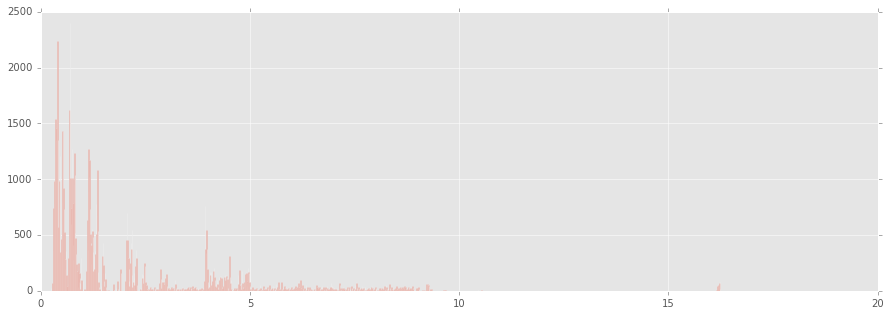

In [250]:
plt.hist(DF_joint['lapse'],bins=np.arange(0,20,0.01))

In [246]:
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [252]:
max(DF_joint['lapse'])

16.236562500000002